# Predicting Yelp Star Rating

In [153]:
%matplotlib inline

In [154]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
import matplotlib
#matplotlib.style.use('ggplot')
matplotlib.style.use('fivethirtyeight')

In [156]:
# Set the source directory for the input csv files (business.csv, user.csv, review.csv)
source_dir = os.getcwd()
required_files = ['business.csv', 'user.csv', 'review.csv']
nfiles_found = sum( os.path.isfile( os.path.join(source_dir, f) ) for f in required_files)
if nfiles_found < len(required_files):
    source_dir = input('Specify CSV source directory: ')
if nfiles_found < len(required_files):
    print('Source files not found.')
    sys.exit(1)
print('Source directory: {0}'.format(source_dir))

Source directory: /home/marco/workspace-python/YelpExercise


In [157]:
# Load business data
businesses = pd.read_csv( os.path.join(source_dir, 'business.csv'),
    parse_dates=True,
    low_memory=False,
    index_col='business_id'
)
businesses.columns = businesses.columns.str.replace('[^\w.]+','_')
businesses.columns = businesses.columns.str.lower()
attr_cols = [col for col in list(businesses) if col.startswith('attr')]

# Convert attribute columns to numeric values
businesses[attr_cols] = businesses[attr_cols].replace(
    to_replace=[True, 'yes', 'full_bar', 'free', 'yes_free', 'quiet', 'yes_corkage', 'beer_and_wine'], value=1 )
businesses[attr_cols] = businesses[attr_cols].replace(
    to_replace=[False, 'no', 'none', 'very_loud'], value=-1 )
businesses[attr_cols] = businesses[attr_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

#businesses.columns

In [158]:
# Plot the business mean ratings
#star_counts = businesses.stars.value_counts(sort=False, normalize=True).sort_index()
#star_counts.plot(kind="bar", title="Business Mean Ratings", rot='0').set_xlabel('Rating')

In [159]:
# Load user data
users = pd.read_csv( os.path.join(source_dir, 'user.csv'), parse_dates=True, index_col='user_id' )
users.columns = users.columns.str.replace('[^\w.]+','_')
users.columns = users.columns.str.lower()
compl_cols = [col for col in list(users) if col.startswith('compl')]
#users.columns

In [160]:
review_file = os.path.join(source_dir, 'review.csv')

fraction_toread = 100
if fraction_toread <= 1:
    skip_rows = []
else:
    skip_rows = [i for i in range(0, 10000000) if i % fraction_toread != 0]

reviews = pd.read_csv(
    review_file,
    parse_dates=True,
    index_col='review_id',
    skiprows=skip_rows
)
reviews.columns = reviews.columns.str.replace('[^\w.]+','_')
reviews.columns = reviews.columns.str.lower()

reviews['text_length'] = reviews['text'].str.len()

In [161]:
rb = pd.merge(reviews, businesses, how='left', left_on='business_id', right_index=True, suffixes=('_review', '_business'))
rbu = pd.merge(rb, users, how='left', left_on='user_id', right_index=True, suffixes=('_review', '_user'))

times = pd.DatetimeIndex(rbu.date)
rbu['year'] = times.year

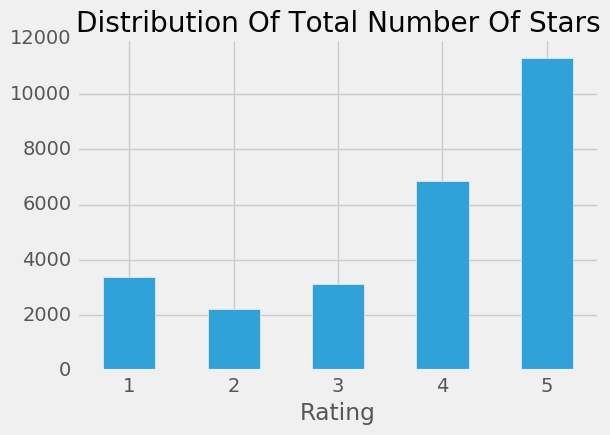

In [162]:
star_counts = rbu['stars_review'].value_counts(normalize=False).sort_index()
star_counts.plot.bar(title="Distribution Of Total Number Of Stars", stacked=False, rot=0).set_xlabel('Rating')

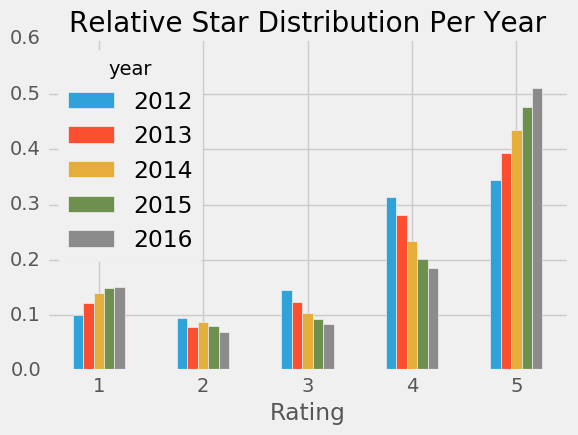

In [163]:
star_counts_per_year = rbu.groupby(['year'])['stars_review'].value_counts(normalize=True).unstack().transpose()
star_counts_per_year[star_counts_per_year.columns[-5:]].plot.bar(title="Relative Star Distribution Per Year", stacked=False, rot=0).set_xlabel('Rating')

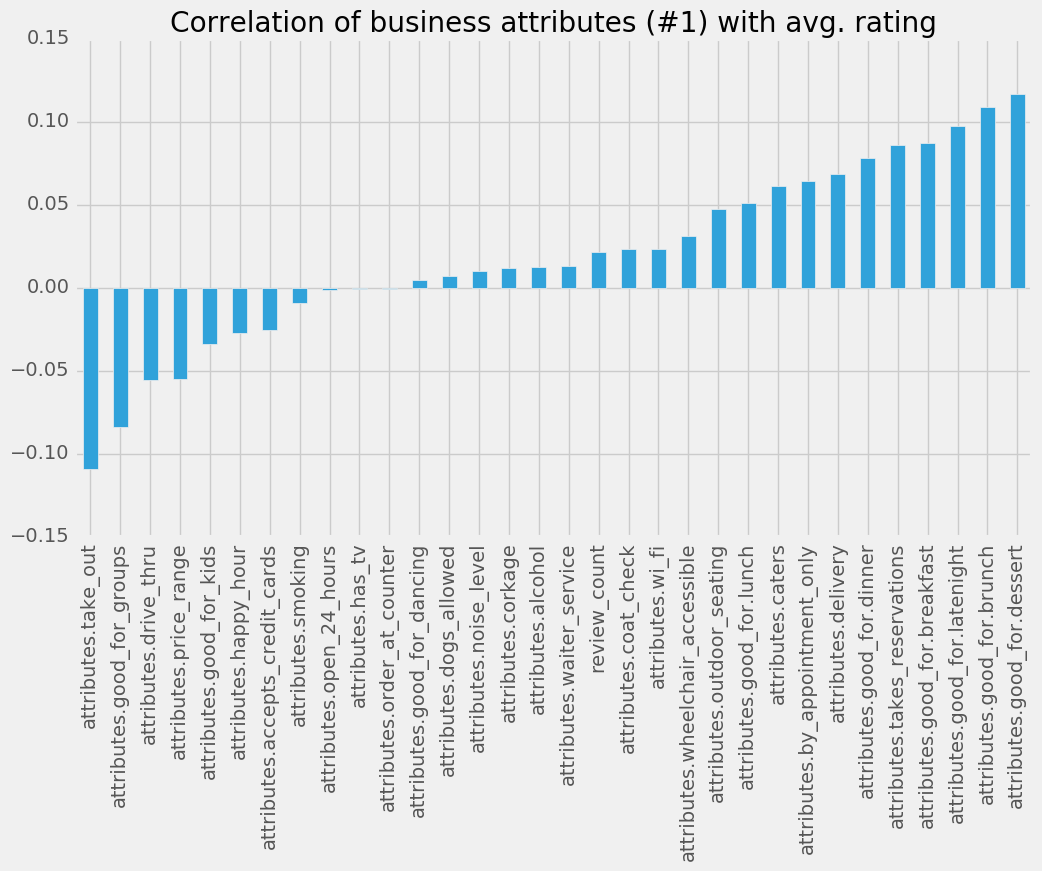

In [164]:
cols = ['attributes.accepts_credit_cards',
 'attributes.alcohol',
 'attributes.by_appointment_only',
 'attributes.caters',
 'attributes.coat_check',
 'attributes.corkage',
 'attributes.delivery',
 'attributes.dogs_allowed',
 'attributes.drive_thru',
 'attributes.good_for_dancing',
 'attributes.good_for_groups',
 'attributes.good_for.breakfast',
 'attributes.good_for.brunch',
 'attributes.good_for.dessert',
 'attributes.good_for.dinner',
 'attributes.good_for.latenight',
 'attributes.good_for.lunch',
 'attributes.good_for_kids',
 'attributes.happy_hour',
 'attributes.has_tv',
 'attributes.noise_level',
 'attributes.open_24_hours',
 'attributes.order_at_counter',
 'attributes.outdoor_seating',
 'attributes.price_range',
 'attributes.smoking',
 'attributes.take_out',
 'attributes.takes_reservations',
 'attributes.waiter_service',
 'attributes.wheelchair_accessible',
 'attributes.wi_fi',
 'review_count']
correls = businesses[cols].corrwith(businesses['stars'], drop=True).sort_values()
correls.plot.bar(figsize=(11,6), title='Correlation of business attributes (#1) with avg. rating')

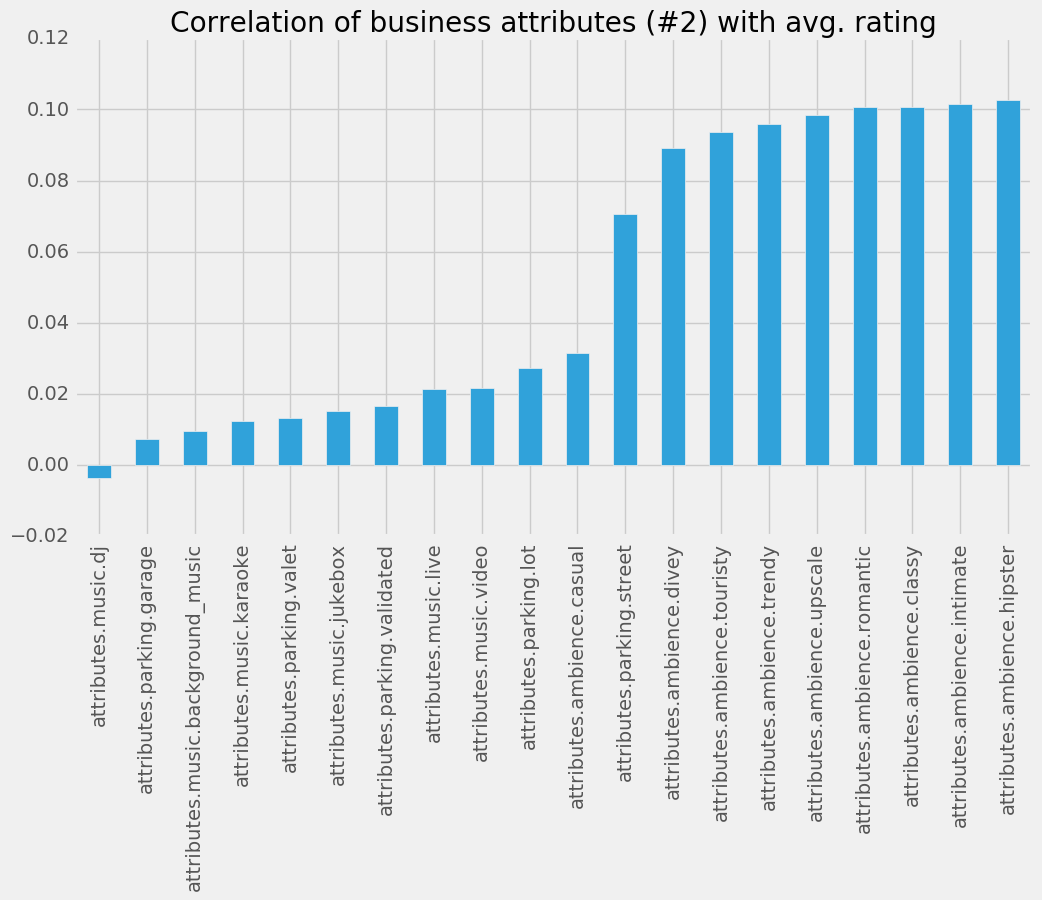

In [165]:
cols = [ 'attributes.ambience.casual',
 'attributes.ambience.classy',
 'attributes.ambience.divey',
 'attributes.ambience.hipster',
 'attributes.ambience.intimate',
 'attributes.ambience.romantic',
 'attributes.ambience.touristy',
 'attributes.ambience.trendy',
 'attributes.ambience.upscale',
 'attributes.music.background_music',
 'attributes.music.dj',
 'attributes.music.jukebox',
 'attributes.music.karaoke',
 'attributes.music.live',
 'attributes.music.video',
 'attributes.parking.garage',
 'attributes.parking.lot',
 'attributes.parking.street',
 'attributes.parking.valet',
 'attributes.parking.validated']
correls = businesses[cols].corrwith(businesses['stars'], drop=True).sort_values()
correls.plot.bar(figsize=(11,6), title='Correlation of business attributes (#2) with avg. rating')

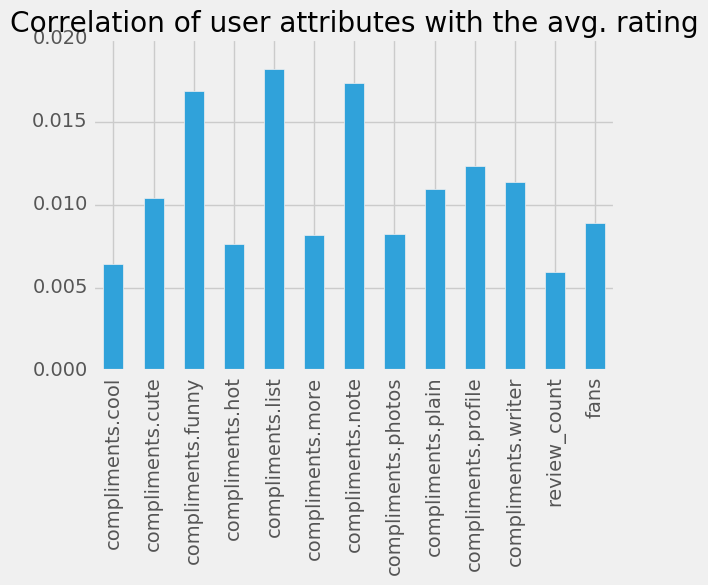

In [166]:
cols = compl_cols + ['review_count', 'fans']
correls = users[cols].corrwith(users['average_stars'], drop=True)
correls.plot.bar(title='Correlation of user attributes with the avg. rating')

In [167]:
pd.options.display.max_seq_items = 500
rbu.columns

Index(['business_id', 'date', 'stars_review', 'text', 'type_review', 'user_id',
       'votes.cool_review', 'votes.funny_review', 'votes.useful_review',
       'text_length', 'attributes.accepts_credit_cards',
       'attributes.accepts_insurance', 'attributes.alcohol',
       'attributes.ambience.casual', 'attributes.ambience.classy',
       'attributes.ambience.divey', 'attributes.ambience.hipster',
       'attributes.ambience.intimate', 'attributes.ambience.romantic',
       'attributes.ambience.touristy', 'attributes.ambience.trendy',
       'attributes.ambience.upscale', 'attributes.attire', 'attributes.byob',
       'attributes.byob_corkage', 'attributes.by_appointment_only',
       'attributes.caters', 'attributes.coat_check', 'attributes.corkage',
       'attributes.delivery', 'attributes.dogs_allowed',
       'attributes.drive_thru', 'attributes.good_for_dancing',
       'attributes.good_for_groups', 'attributes.good_for.breakfast',
       'attributes.good_for.brunch', 'attrib

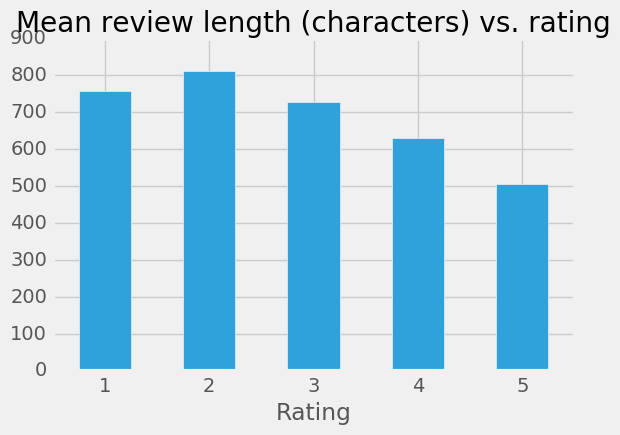

In [168]:
rbu.groupby(['stars_review'])['text_length'].mean().plot.bar(title="Mean review length (characters) vs. rating", stacked=False, rot=0).set_xlabel('Rating')